In [1]:
import re
import requests
from bs4 import BeautifulSoup
def getHTML(url):
    try:
        r = requests.get(url,timeout=30)
        r.raise_for_status()
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return ""

def getContent(url):
    html = getHTML(url)
    soup = BeautifulSoup(html,'html.parser')
    title = soup.select('div.mbtitle')
    paras_tmp = soup.select('p')
    paras = paras_tmp[3:]
    return paras
 
def saveFile(text):
    f=open('novel.txt','w',encoding='utf-8')
    for t in text:
        if len(t) > 0:
            f.writelines(t.get_text() + "\n")
    f.close()
    
def main():
    url = 'http://www.gov.cn/zhengce/content/2018-09/26/content_5325472.htm'
    text = getContent(url)
    saveFile(text)

    
main()

In [2]:
import jieba
import requests
dics_counts={}
lst=[]
def txt_to_sta():
    lst_top3=[]
    # fil1=input()
    txt = open('novel.txt', encoding="utf-8").read()
    #加载停用词表
    stopwords = [line.strip() for line in open(r"D:\try\停用词.txt",encoding="utf-8").readlines()]
    words  = jieba.lcut(txt)
    counts = {}
    for word in words:
    #不在停用词表中
        if word not in stopwords:
        #不统计字数为一的词
            if len(word) == 1:
                continue
            else:
                counts[word] = counts.get(word,0) + 1
    items = list(counts.items())
    items.sort(key=lambda x:x[1], reverse=True)
    for i in range(3):
        word, count = items[i]
        if word.isdigit():
            continue
        else:
            dics_counts[word]=dics_counts.get(word,0)+1
            lst_top3.append(word)
    lst.append(lst_top3)
    
    print(lst_top3)
    '''print(lst)
    print(dics_counts)
    print(counts)
    print(items)'''
    
    
txt_to_sta()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HONEYM~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.634 seconds.
Prefix dict has been built successfully.


['创新', '创业', '企业']
[['创新', '创业', '企业']]
{'创新': 1, '创业': 1, '企业': 1}
{'各省': 1, '自治区': 1, '直辖市': 1, '国务院': 3, '各部委': 1, '直属机构': 1, '创新': 157, '引领': 3, '第一': 1, '动力': 3, '现代化': 1, '经济': 11, '支撑': 9, '大众': 7, '创业': 135, '万众': 7, '持续': 8, '高层次': 3, '更深': 1, '程度': 1, '经济社会': 1, '深度': 6, '融合': 11, '新旧': 1, '动能': 3, '转换': 1, '结构': 3, '升级': 10, '就业': 11, '改善': 2, '民生': 1, '机会': 1, '公平': 3, '纵向': 2, '流动': 3, '发挥': 9, '作用': 13, '增长': 2, '提供': 8, '我国': 3, '高速': 1, '阶段': 2, '转向': 1, '高质量': 8, '提出': 2, '驱动': 4, '进一步': 13, '激发': 4, '市场': 11, '活力': 6, '创造力': 2, '打造': 11, '双创': 15, '升级版': 4, '意见': 2, '总体': 3, '供给': 3, '结构性': 3, '改革': 28, '重要途径': 1, '蓬勃发展': 1, '环境': 5, '主体': 7, '多元': 1, '各类': 7, '平台': 23, '不断丰富': 1, '氛围': 2, '浓厚': 1, '理念': 2, '深入人心': 1, '成效': 1, '生态': 2, '科技成果': 10, '转化': 9, '大中小企业': 8, '融通': 6, '国际': 8, '合作': 13, '政策': 22, '到位': 1, '有利于': 3, '带动': 7, '科技': 26, '产业': 16, '创造': 3, '优质': 2, '需求': 3, '内生': 1, '意义': 2, '指导思想': 1, '习近平': 1, '时代': 1, '特色': 2, '思想': 2, '指导': 4, '贯彻': 1, '十九': 

In [39]:
import pandas as pd

In [40]:
df = pd.read_excel( r'C:\Users\HONEYMOON\Desktop\规划\中央创业政策.xlsx', usecols=[0])

In [47]:
len(df)

392

In [51]:
df

,发布时间
0,2020-12-24
1,2020-11-19
2,2020-11-17
3,2020-11-09
4,2020-11-02
...,...
387,2010-04-19
388,2010-04-15
389,2010-01-25
390,2010-01-11


In [155]:
import pandas as pd
import numpy as np
df = pd.read_excel(r'C:\Users\HONEYMOON\Desktop\规划\中央创业政策2.xlsx')

test_data = []

for i in df.index.values: 

    row_data = df.loc[i, ['发布时间', '文件名称', '网址']].to_dict()

    test_data.append(row_data)

print("最终获取到的数据是：\n{0}".format(test_data))

最终获取到的数据是：
[{'发布时间': Timestamp('2020-12-24 00:00:00'), '文件名称': '国务院办公厅关于建设第三批大众创业万众创新示范基地的通知', '网址': 'http://www.gov.cn/zhengce/content/2020-12/24/content_5572999.htm'}, {'发布时间': Timestamp('2020-11-19 00:00:00'), '文件名称': '人力资源社会保障部组织实施创业培训“马兰花计划”', '网址': 'http://www.mohrss.gov.cn/SYrlzyhshbzb/rdzt/zyjntsxd/zyjntsxd_xdjz/202011/t20201119_397882.html'}, {'发布时间': Timestamp('2020-11-17 00:00:00'), '文件名称': '人力资源社会保障部关于实施职业技能提升行动创业培训“马兰花计划”的通知', '网址': 'http://www.mohrss.gov.cn/SYrlzyhshbzb/rdzt/zyjntsxd/zyjntsxd_xdzn/202011/t20201117_397433.html'}, {'发布时间': Timestamp('2020-11-09 00:00:00'), '文件名称': '国务院办公厅关于推进对外贸易创新发展的实施意见', '网址': 'http://www.gov.cn/zhengce/content/2020-11/09/content_5559659.htm'}, {'发布时间': Timestamp('2020-11-02 00:00:00'), '文件名称': '国务院办公厅关于印发新能源汽车产业发展规划（2021—2035年）的通知', '网址': 'http://www.gov.cn/zhengce/content/2020-11/02/content_5556716.htm'}, {'发布时间': Timestamp('2020-08-06 00:00:00'), '文件名称': '人力资源社会保障部 国家发展改革委等十五部门关于做好当前农民工就业创业工作的意见', '网址': 'http://www.gov.cn/zhengce/zhen

In [156]:
import pandas as pd

df = pd.read_excel(r'C:\Users\HONEYMOON\Desktop\规划\中央创业政策2.xlsx')
s = df['发布时间'].dt.date.values

print("输出值\n", s)

输出值
 [datetime.date(2020, 12, 24) datetime.date(2020, 11, 19)
 datetime.date(2020, 11, 17) datetime.date(2020, 11, 9)
 datetime.date(2020, 11, 2) datetime.date(2020, 8, 6)
 datetime.date(2020, 7, 30) datetime.date(2020, 7, 24)
 datetime.date(2020, 7, 18) datetime.date(2020, 7, 16)
 datetime.date(2020, 7, 10) datetime.date(2020, 7, 10)
 datetime.date(2020, 7, 3) datetime.date(2020, 6, 17)
 datetime.date(2020, 6, 12) datetime.date(2020, 5, 9)
 datetime.date(2020, 4, 30) datetime.date(2020, 4, 17)
 datetime.date(2020, 4, 8) datetime.date(2020, 4, 4)
 datetime.date(2020, 3, 30) datetime.date(2020, 3, 24)
 datetime.date(2020, 3, 22) datetime.date(2020, 3, 6)
 datetime.date(2020, 2, 29) datetime.date(2020, 2, 28)
 datetime.date(2020, 2, 14) datetime.date(2019, 12, 3)
 datetime.date(2019, 10, 28) datetime.date(2019, 10, 25)
 datetime.date(2019, 10, 15) datetime.date(2019, 9, 29)
 datetime.date(2019, 9, 5) datetime.date(2019, 8, 30)
 datetime.date(2019, 8, 14) datetime.date(2019, 8, 5)
 dateti

In [157]:
print(s[390:])

[]


In [158]:
year = {}
for i in s:
    if str(i)[:4] not in year:
        year[str(i)[:4]] = 1
    else:
        year[str(i)[:4]] += 1
print(year)

{'2020': 27, '2019': 25, '2018': 29, '2017': 18, '2016': 20, '2015': 39, '2014': 53, '2013': 22, '2012': 14, '2011': 16, '2010': 13}


In [159]:
num_lst = []
year_lst = []
for i in year.values():
    num_lst.append(i)
for i in year.keys():
    year_lst.append(i)
num_lst = num_lst[::-1]
year_lst = year_lst[::-1]
print(num_lst)
print(year_lst)

[13, 16, 14, 22, 53, 39, 20, 18, 29, 25, 27]
['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


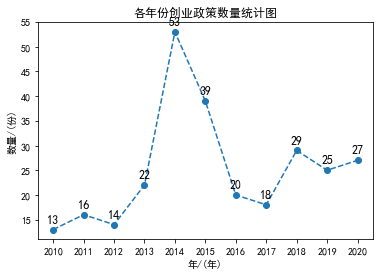

In [160]:
import matplotlib.pyplot as plt
x = year_lst
y = num_lst
plt.plot(x, y,marker='o',linestyle='dashed')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('年/(年)')
plt.ylabel('数量/(份)')
plt.title('各年份创业政策数量统计图')
for a,b in zip(x,y):
    plt.text(a, b+1, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
plt.show()


In [205]:
import pandas as pd
import matplotlib.pyplot as plt

def policy_num():
    df = pd.read_excel(r'C:\Users\HONEYMOON\Desktop\规划\中央创业政策2.xlsx')
    s = df['发布时间'].dt.date.values
    year = {}
    for i in s:
        if str(i)[:4] not in year:
            year[str(i)[:4]] = 1
        else:
            year[str(i)[:4]] += 1


    num_lst = []
    year_lst = []
    for i in year.values():
        num_lst.append(i)
    for i in year.keys():
        year_lst.append(i)
    num_lst = num_lst[::-1]
    year_lst = year_lst[::-1]


    x = year_lst
    y = num_lst
    plt.figure(figsize=(10, 7)) 
    plt.plot(x, y,marker='o',linestyle='dashed')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.xlabel('年/(年)')
    plt.ylabel('数量/(份)')
    plt.title('各年份创业政策数量统计图')
    for a,b in zip(x,y):
        plt.text(a, b-2, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
    plt.show()

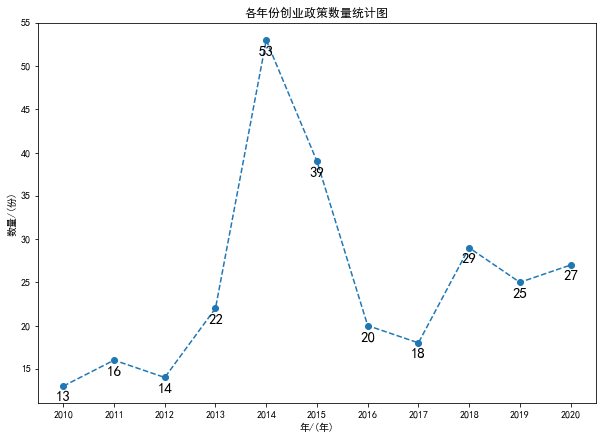

In [206]:
policy_num()